本征值: [-0.12500163 -0.0555563 ] l_H= 1


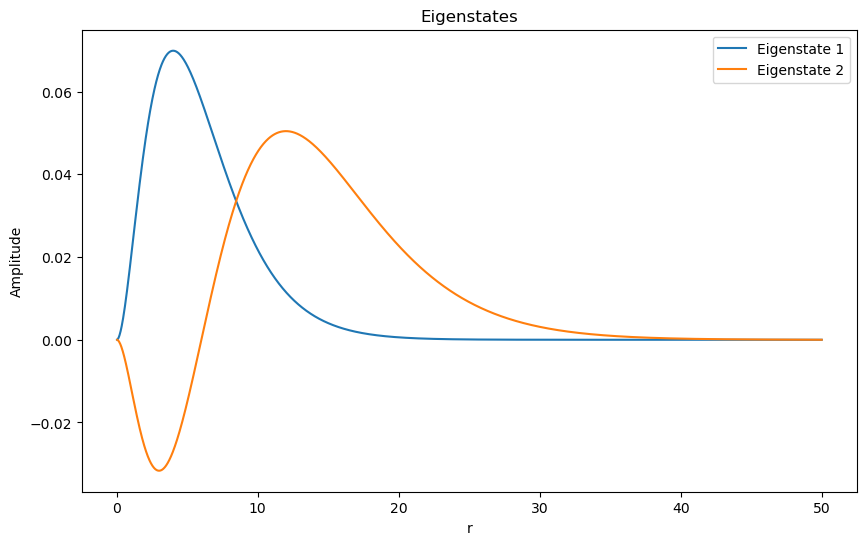

本征值 (Li): [-4.46227805 -1.11619925] l_Li= 0


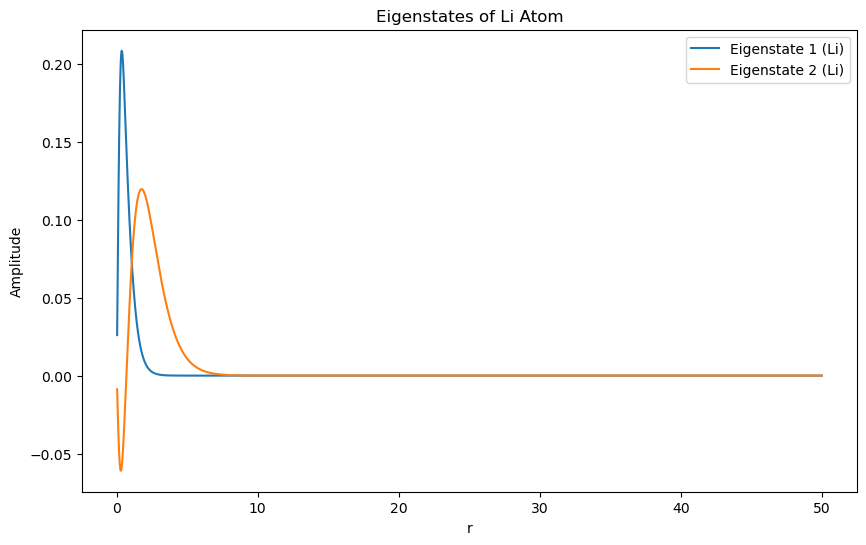

In [204]:
import math
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import numpy as np

def V(r):
    return -1/r

def V_loc(r):
    Z_ion = 3
    r_loc = 0.4
    C1 = -14.0093922
    C2 = 9.5099073
    C3 = -1.7532723
    C4 = 0.0834586
    # 计算V_loc(r)
    term1 = (-Z_ion / r) * math.erf(r / np.sqrt(2) / r_loc)
    term2 = np.exp(-0.5 * (r / r_loc)**2)
    term3 = C1 + C2 * (r / r_loc)**2 + C3 * (r / r_loc)**4 + C4 * (r / r_loc)**6
    V_loc = term1 + term2 * term3
    return V_loc

def H_H(n):
    l = 1
    rm = 50
    s = rm / n
    H_Hmatrix = np.zeros((n, n))
    R = [(r+1)*s for r in range(n)]
    for i in range(n):
        if i >= 1:
            H_Hmatrix[i][i-1] = -1/(2*s**2)
        if i < n-1:
            H_Hmatrix[i][i+1] = -1/(2*s**2)
        H_Hmatrix[i][i] = V(s*(i+1)) + 1/(s**2) + 1/2*l*(l+1)/((s*(i+1))**2)
    return H_Hmatrix, R, l

def H_Li(n):
    l = 0
    rm = 50
    s = rm / n
    H_Limatrix = np.zeros((n, n))
    R = [(r+1)*s for r in range(n)]
    for i in range(n):
        if i >= 1:
            H_Limatrix[i][i-1] = -1/(2*s**2)
        if i < n-1:
            H_Limatrix[i][i+1] = -1/(2*s**2)
        H_Limatrix[i][i] = V_loc(s*(i+1)) + 1/(s**2) + 1/2*l*(l+1)/((s*(i+1))**2)
    return H_Limatrix, R, l

# 构建哈密顿矩阵
H_Hmatrix, r_H, l_H = H_H(2000)
# 计算最小的三个本征值和对应的本征向量
eigenvalues_H, eigenvectors_H = eigh(H_Hmatrix, eigvals=(0, 1))
# 打印本征值
print("本征值:", eigenvalues_H, "l_H=", l_H)

# 可视化本征向量
plt.figure(figsize=(10, 6))
for i in range(eigenvectors_H.shape[1]): 
    plt.plot(r_H, eigenvectors_H[:, i], label=f'Eigenstate {i+1}')
plt.title('Eigenstates')
plt.xlabel('r')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# 构建锂原子的哈密顿矩阵
H_Limatrix, r_Li, l_Li = H_Li(2000)
# 计算最小的三个本征值和对应的本征向量
eigenvalues_Li, eigenvectors_Li = eigh(H_Limatrix, eigvals=(0, 1))
# 打印本征值
print("本征值 (Li):", eigenvalues_Li, "l_Li=", l_Li)
# 可视化锂原子的本征向量
plt.figure(figsize=(10, 6))
for i in range(eigenvectors_Li.shape[1]):  
    plt.plot(r_Li, eigenvectors_Li[:, i], label=f'Eigenstate {i+1} (Li)')
plt.title('Eigenstates of Li Atom')
plt.xlabel('r')
plt.ylabel('Amplitude')
plt.legend()
plt.show()